### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, RobustScaler
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

### Import Data

In [2]:
data = pd.read_csv("/media/mowli/New Volume/Guvi/capston/FN/data/Credit Card_Clustering.csv")
data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

### fill null rows

In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
data['MINIMUM_PAYMENTS']= data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())
data['CREDIT_LIMIT']= data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median())

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df = data.copy()
df.drop(['CUST_ID'],axis=1,inplace=True)

### Data Exploration

In [7]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        312.343947          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        312.343947          0.000000       6  
8947    81

In [8]:
df.shape

(8950, 17)

In [9]:
df_copy = df

In [10]:
#avg monthly purchase
df_copy['Monthly_Avg_Purchase'] = df_copy['PURCHASES']/df_copy['TENURE']
df_copy['Monthly_Avg_Purchase']

0         7.950000
1         0.000000
2        64.430833
3       124.916667
4         1.333333
           ...    
8945     48.520000
8946     50.000000
8947     24.066667
8948      0.000000
8949    182.208333
Name: Monthly_Avg_Purchase, Length: 8950, dtype: float64

In [11]:
#avg monthly cash advance
df_copy['Monthly_Avg_Cash'] = df_copy['CASH_ADVANCE']/df_copy['TENURE']
df_copy['Monthly_Avg_Cash']

0         0.000000
1       536.912124
2         0.000000
3        17.149001
4         0.000000
           ...    
8945      0.000000
8946      0.000000
8947      0.000000
8948      6.093130
8949     21.173335
Name: Monthly_Avg_Cash, Length: 8950, dtype: float64

In [12]:
df_purchases = df_copy[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]
df_purchases

ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
0                 0.00                   95.40
1                 0.00                    0.00
2               773.17                    0.00
3              1499.00                    0.00
4                16.00                    0.00
...                ...                     ...
8945              0.00                  291.12
8946              0.00                  300.00
8947              0.00                  144.40
8948              0.00                    0.00
8949           1093.25                    0.00

[8950 rows x 2 columns]

In [13]:
# Step 2: Filtering on the categories and taking the count of those categories:

# 1:
df_purchases[(df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] == 0)].shape

(2042, 2)

In [14]:
# 2:
df_purchases[(df_purchases['ONEOFF_PURCHASES'] > 0) & (df_purchases['INSTALLMENTS_PURCHASES'] == 0)].shape

(1874, 2)

In [15]:
# 3.
df_purchases[(df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0)].shape

(2260, 2)

In [16]:
# 4.
df_purchases[(df_purchases['ONEOFF_PURCHASES'] > 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0)].shape

(2774, 2)

We can see that the total 8949 customers who have credit card are divided into 4 parts. Hence, will be creating categories to group customers based on their purchase type.

The 4 categories are:

1) Both_the_Purchases      
2) Installment_Purchases    
3) None_Of_the_Purchases    
4) One_Of_Purchase  


In [17]:
df_copy['Purchase_Type'] = np.where((df_copy['ONEOFF_PURCHASES'] == 0) & (df_copy['INSTALLMENTS_PURCHASES'] == 0),'None_Of_the_Purchases',
                    np.where((df_copy['ONEOFF_PURCHASES'] > 0) & (df_copy['INSTALLMENTS_PURCHASES'] == 0), 'One_Of_Purchase',
np.where((df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0),'Installment_Purchases','Both_the_Purchases')))

In [18]:
df_copy['Purchase_Type'] .value_counts()

Purchase_Type
Both_the_Purchases       2774
Installment_Purchases    2260
None_Of_the_Purchases    2042
One_Of_Purchase          1874
Name: count, dtype: int64

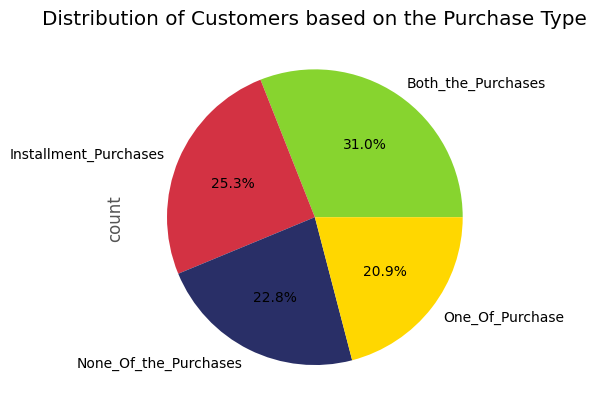

In [19]:
df_copy['Purchase_Type'].value_counts().sort_index().plot(kind='pie',autopct='%1.01f%%', 
                     colors =['#87d42f','#d33243','#292f67','#FFD700'],fontsize=10,textprops = {'fontsize': 18})
plt.title('Distribution of Customers based on the Purchase Type')
plt.show()

In [20]:
df_copy['Limit_Usage'] = df_copy['BALANCE']/df_copy['CREDIT_LIMIT']
df_copy['Limit_Usage']

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: Limit_Usage, Length: 8950, dtype: float64

In [21]:
df_copy['Pay_to_MinimumPay'] = df_copy['PAYMENTS']/df_copy['MINIMUM_PAYMENTS']
df_copy['Pay_to_MinimumPay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: Pay_to_MinimumPay, Length: 8950, dtype: float64

In [22]:
# Step1: Find the average of Pay_to_MinimumPay for each of the Purchase Type 

t1 = df_copy.groupby(by=['Purchase_Type'])['Pay_to_MinimumPay'].mean().sort_values(ascending=False)
t1

Purchase_Type
Installment_Purchases    13.259004
None_Of_the_Purchases    10.087451
Both_the_Purchases        7.236982
One_Of_Purchase           5.571082
Name: Pay_to_MinimumPay, dtype: float64

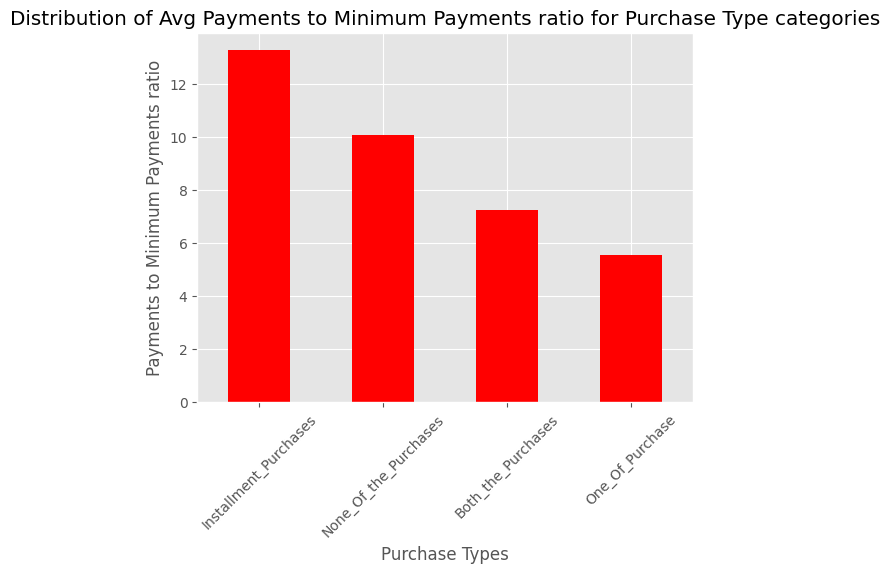

In [23]:
# Step 2: Plot the graph

t1.plot(kind='bar',color='red')
plt.title('Distribution of Avg Payments to Minimum Payments ratio for Purchase Type categories')
plt.xlabel('Purchase Types')
plt.ylabel('Payments to Minimum Payments ratio')
plt.xticks(rotation=45)
plt.show()

### Inference:

Customers who made the installment purchases paid the highest average minimum payment dues.

In [24]:
# Step 1: Find the average of Limit Usage i.e of the credit card score for each of the Purchase Type:

t2 = df_copy.groupby(['Purchase_Type'])['Limit_Usage'].mean().sort_values(ascending = True).reset_index()
t2

Purchase_Type  Limit_Usage
0  Installment_Purchases     0.271678
1     Both_the_Purchases     0.353548
2        One_Of_Purchase     0.381074
3  None_Of_the_Purchases     0.573771

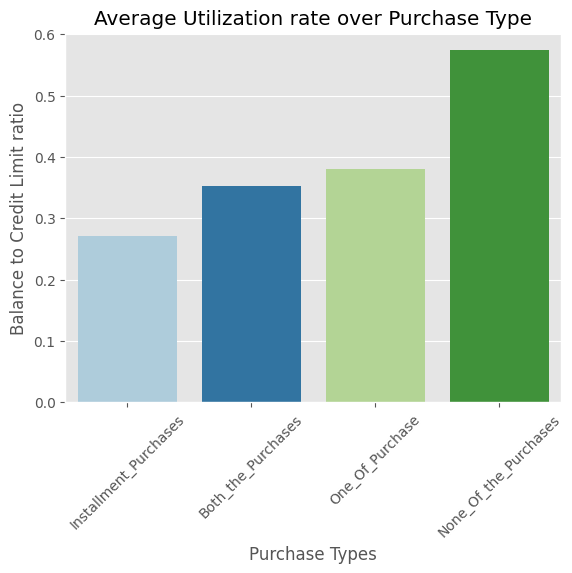

In [25]:
# Step 2: Plot the graph of Average Utilization rate over Purchase type

sns.barplot(x = t2['Purchase_Type'],y =  t2['Limit_Usage'], palette='Paired')
plt.title('Average Utilization rate over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Balance to Credit Limit ratio')
plt.xticks(rotation=45)
plt.show()


### Inference:

A lower balance-to-limit ratio is desirable which indicates there is low credit risk. The customers who make installment purchases have the lowest utilization rate. 

In [26]:
#Find the average of Monthly Average Purchase for each Purchase Type

t3 = df_copy.groupby(by=['Purchase_Type'])['Monthly_Avg_Purchase'].mean().sort_values(ascending=False) 
t3

Purchase_Type
Both_the_Purchases       192.685172
One_Of_Purchase           69.688958
Installment_Purchases     46.974347
None_Of_the_Purchases      0.000000
Name: Monthly_Avg_Purchase, dtype: float64

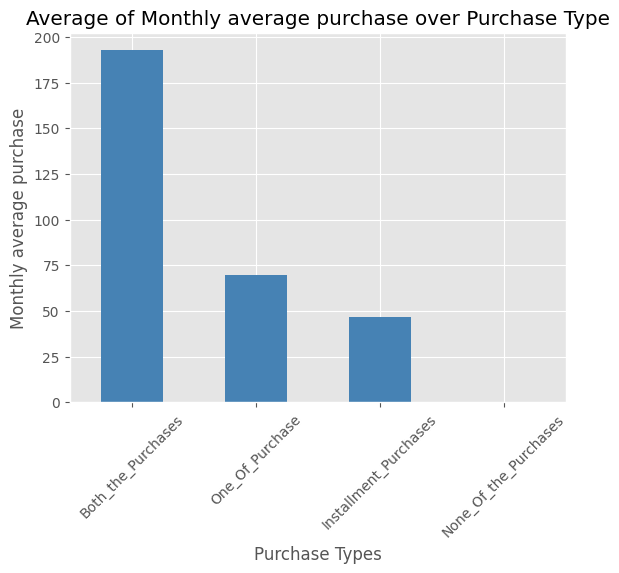

In [27]:
t3.plot(kind='bar',color='steelblue')
plt.title('Average of Monthly average purchase over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly average purchase')
plt.xticks(rotation=45)
plt.show()

### Inference:

The customers who made both the one off and installment purchases have made the highhest total average purchase amount over the last 12 months.

In [28]:
#Find the average of Monthly Average Cash Advance for each Purchase Type

t4 = df_copy.groupby(['Purchase_Type'])['Monthly_Avg_Cash'].mean().sort_values(ascending=False).reset_index()
t4

Purchase_Type  Monthly_Avg_Cash
0  None_Of_the_Purchases        182.858169
1        One_Of_Purchase         78.995966
2     Both_the_Purchases         67.821985
3  Installment_Purchases         38.398206

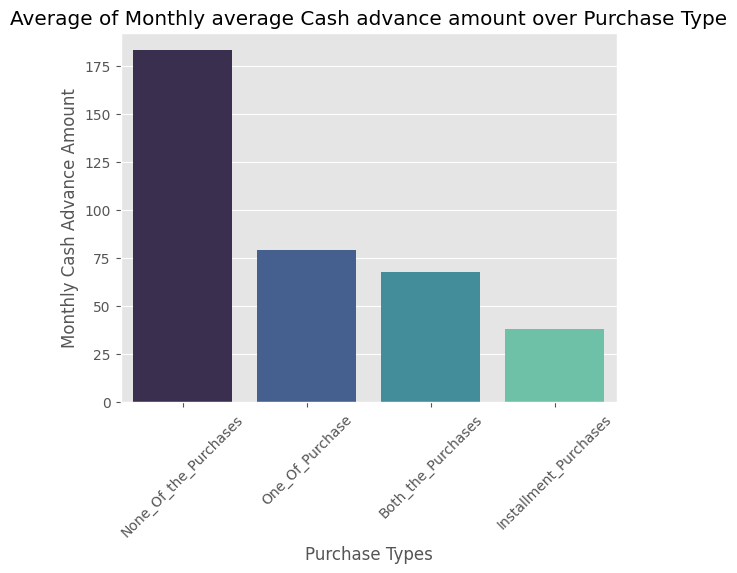

In [29]:
sns.barplot(x = t4['Purchase_Type'], y = t4['Monthly_Avg_Cash'], palette='mako')
plt.title('Average of Monthly average Cash advance amount over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly Cash Advance Amount')
plt.xticks(rotation=45)
plt.show()

### Inference:

The customers who made neither the one off purchase nor the installments purchase have made the highest monthly average cash in advance amount. 

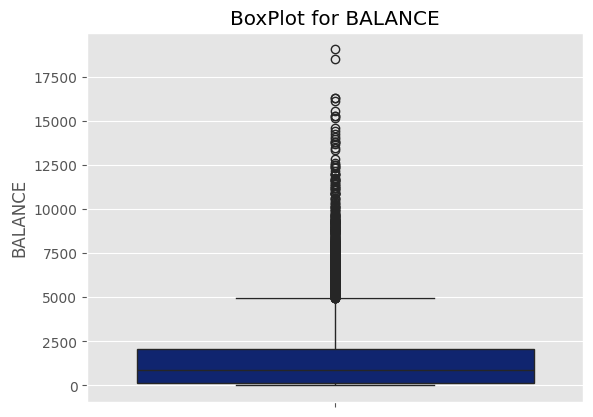

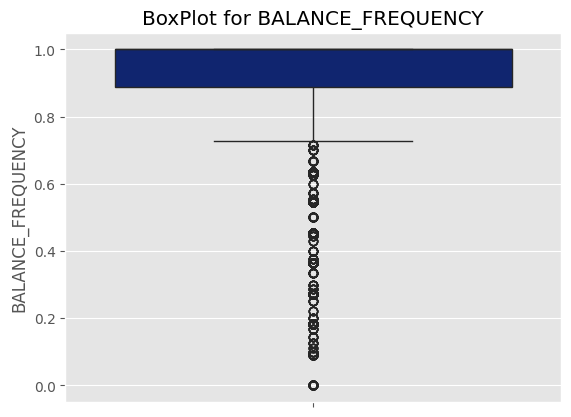

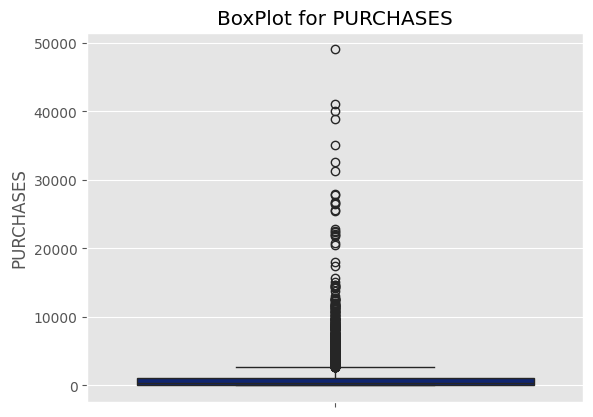

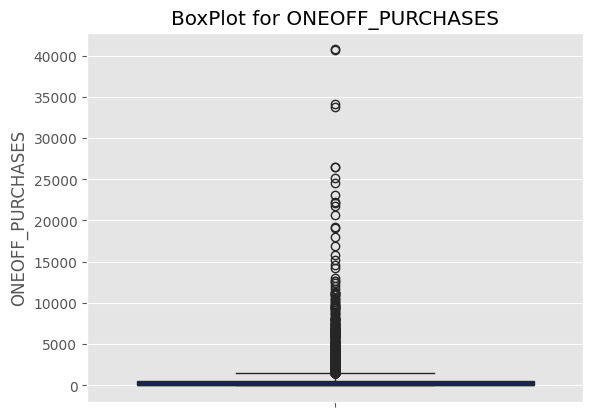

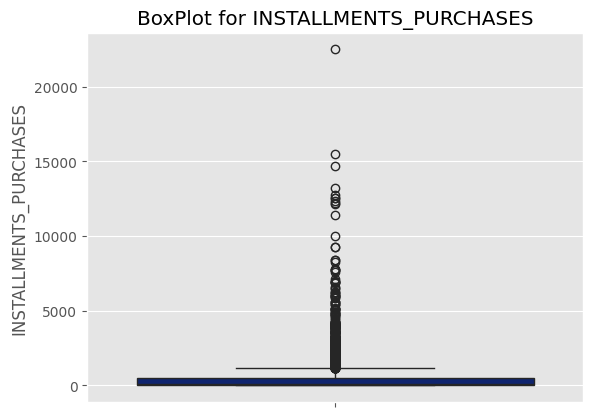

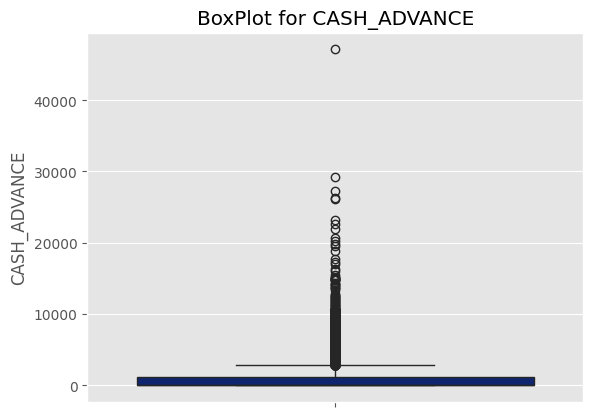

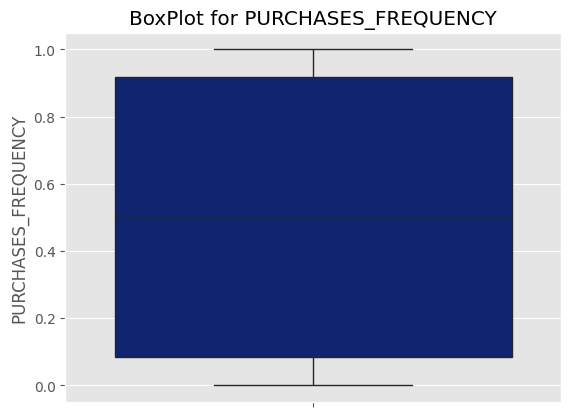

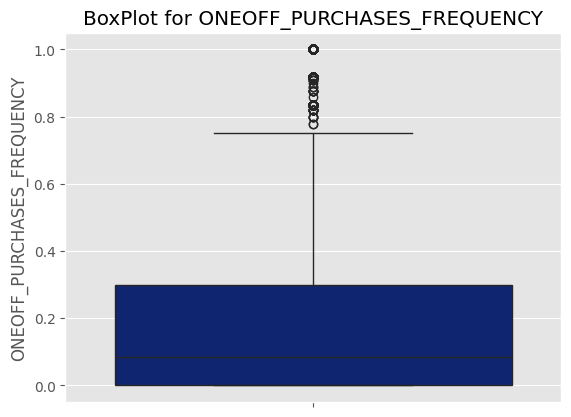

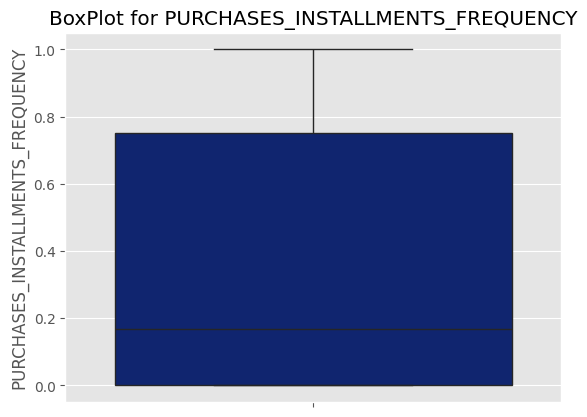

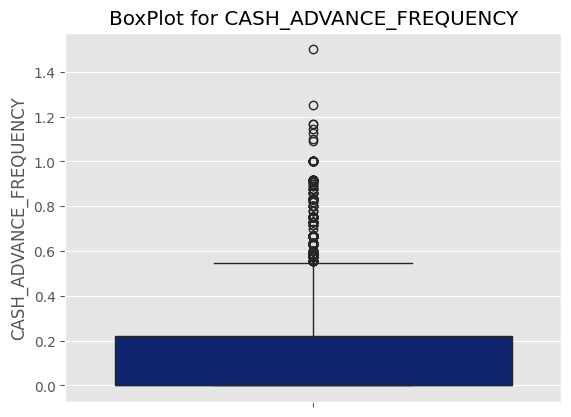

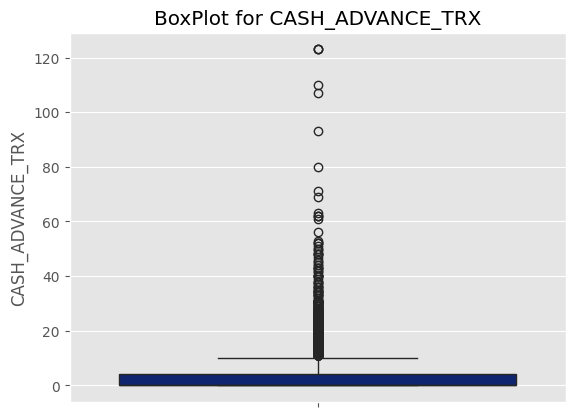

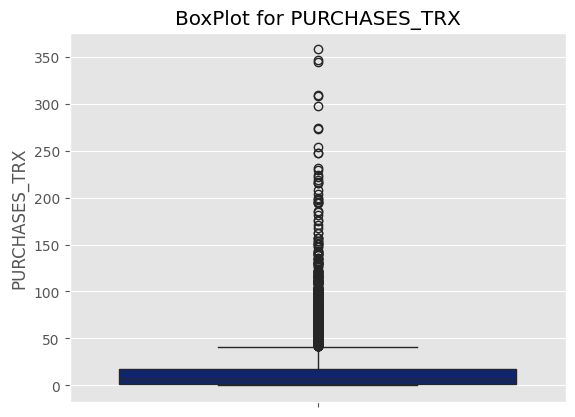

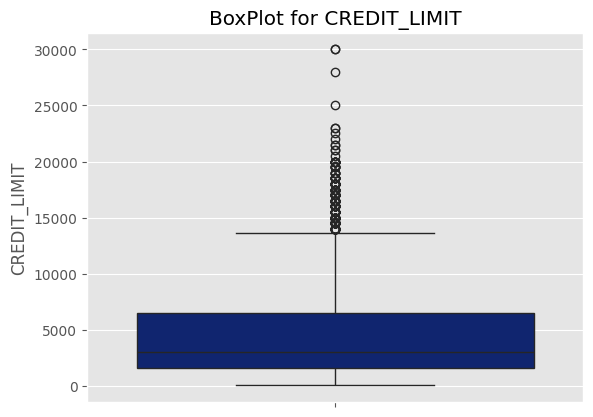

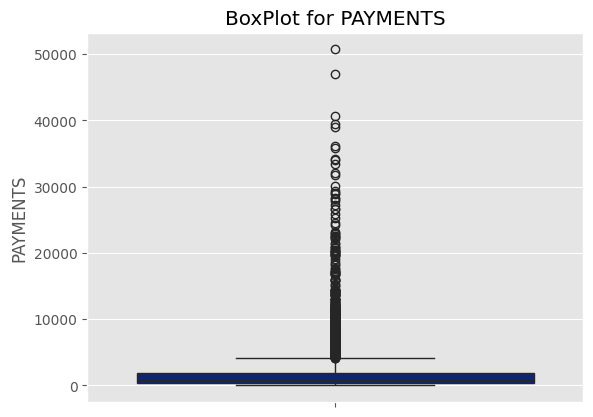

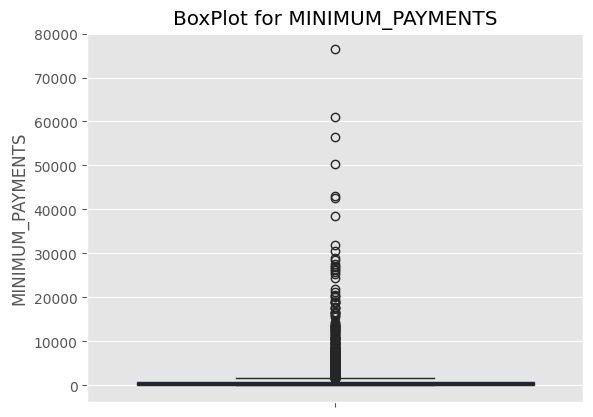

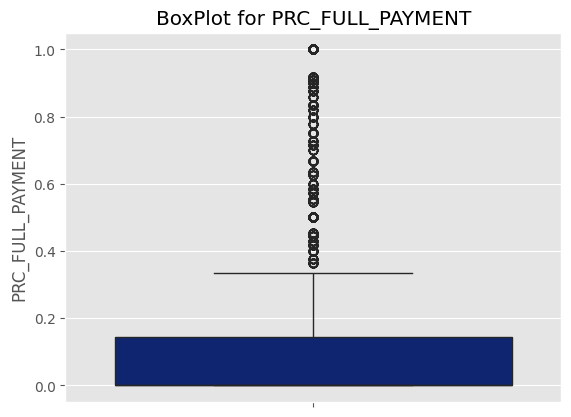

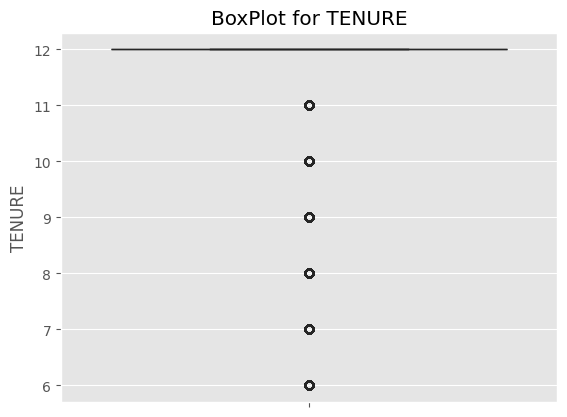

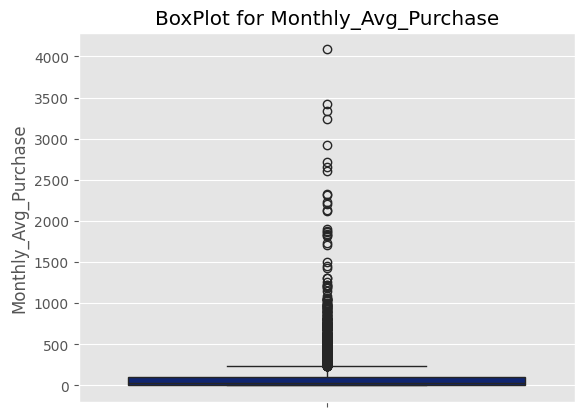

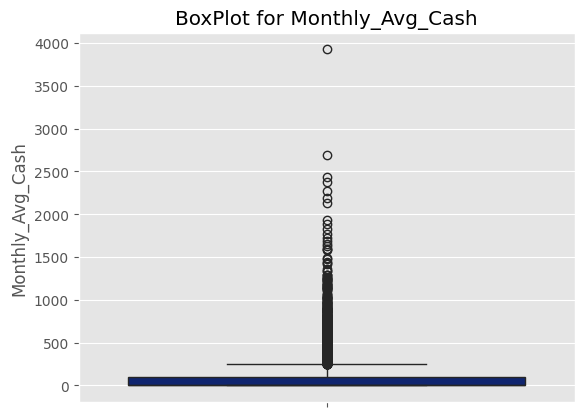

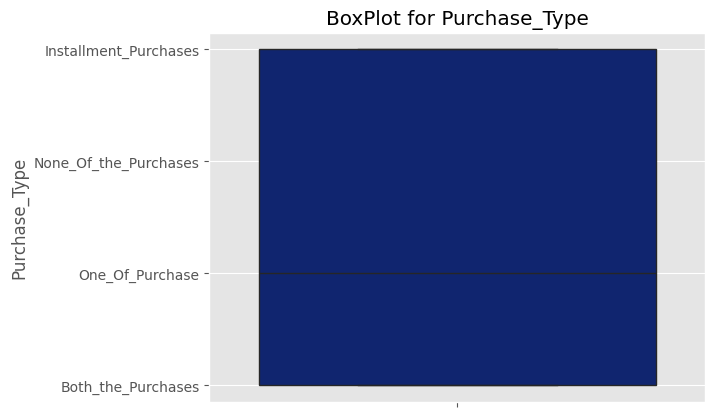

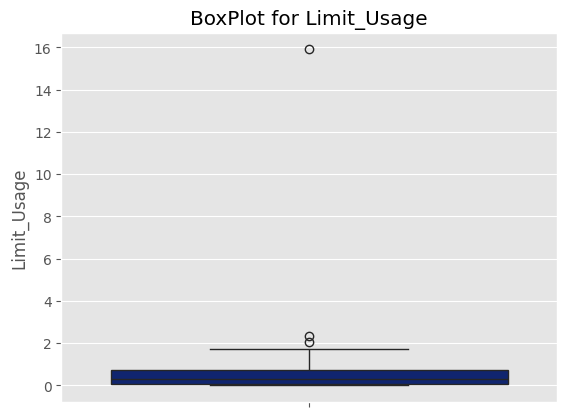

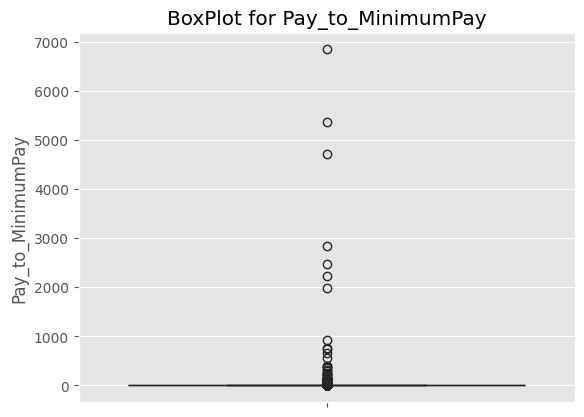

In [30]:
for i in df.columns:
    sns.boxplot(df[i], palette='dark')
    plt.title('BoxPlot for {}'.format(i))
    plt.show()

In [31]:
df = data.copy()

In [32]:
data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        312.343947          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [33]:
df.drop(['CUST_ID'],axis=1,inplace=True)

In [34]:
# df_copy1 = df_copy

In [35]:
# df_copy.drop(['BALANCE','CREDIT_LIMIT','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','TENURE','CASH_ADVANCE'], axis=1, inplace=True)

In [36]:
# def new_func():
#     df_copy

# new_func()

In [37]:
# df_copy

In [38]:
# features = ["BALANCE_FREQUENCY","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","PRC_FULL_PAYMENT","Monthly_Avg_Purchase","Monthly_Avg_Cash","Limit_Usage","Pay_to_MinimumPay"]

In [39]:
# data.drop(["CUST_ID"],axis=1,inplace=True)

In [40]:
# d = df[features]

### Correlation

In [41]:
corr_df = df.corr()
corr_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531296           0.095931   0.356977   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.397920           0.131181   0.095789   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319735                0.256515   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.050256                0.134019   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303997             0.119833   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.140747             0.006154   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

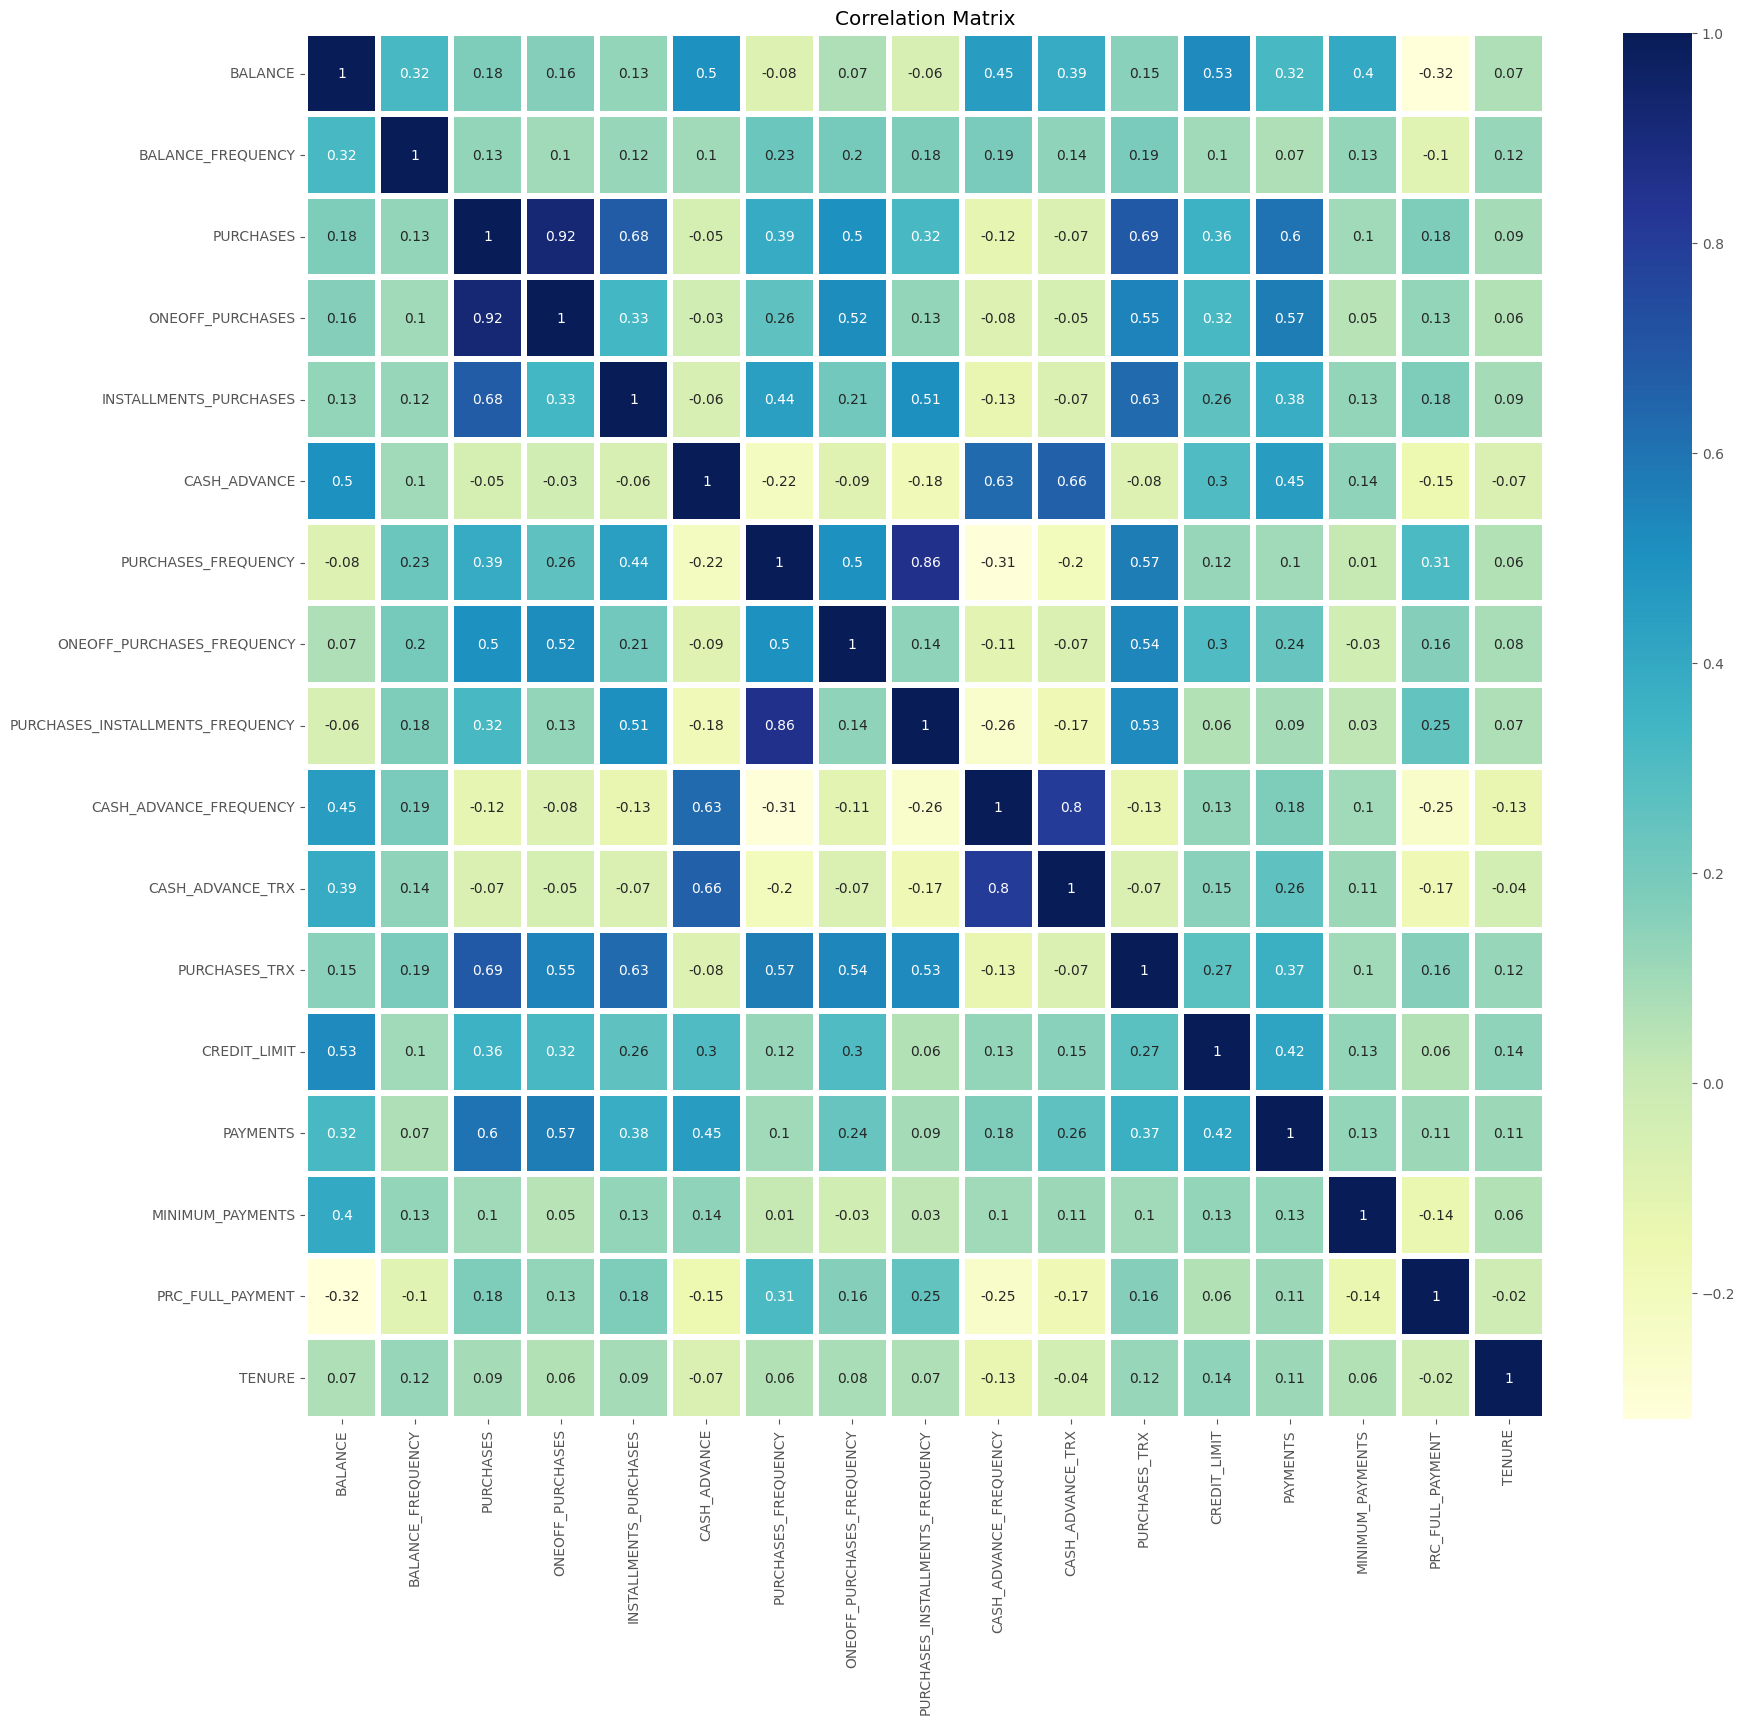

In [42]:
### finding Correlation among the variables:

plt.figure(figsize=(20,18))
sns.heatmap(round(df.corr(),2),annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

In [43]:
# df_copy

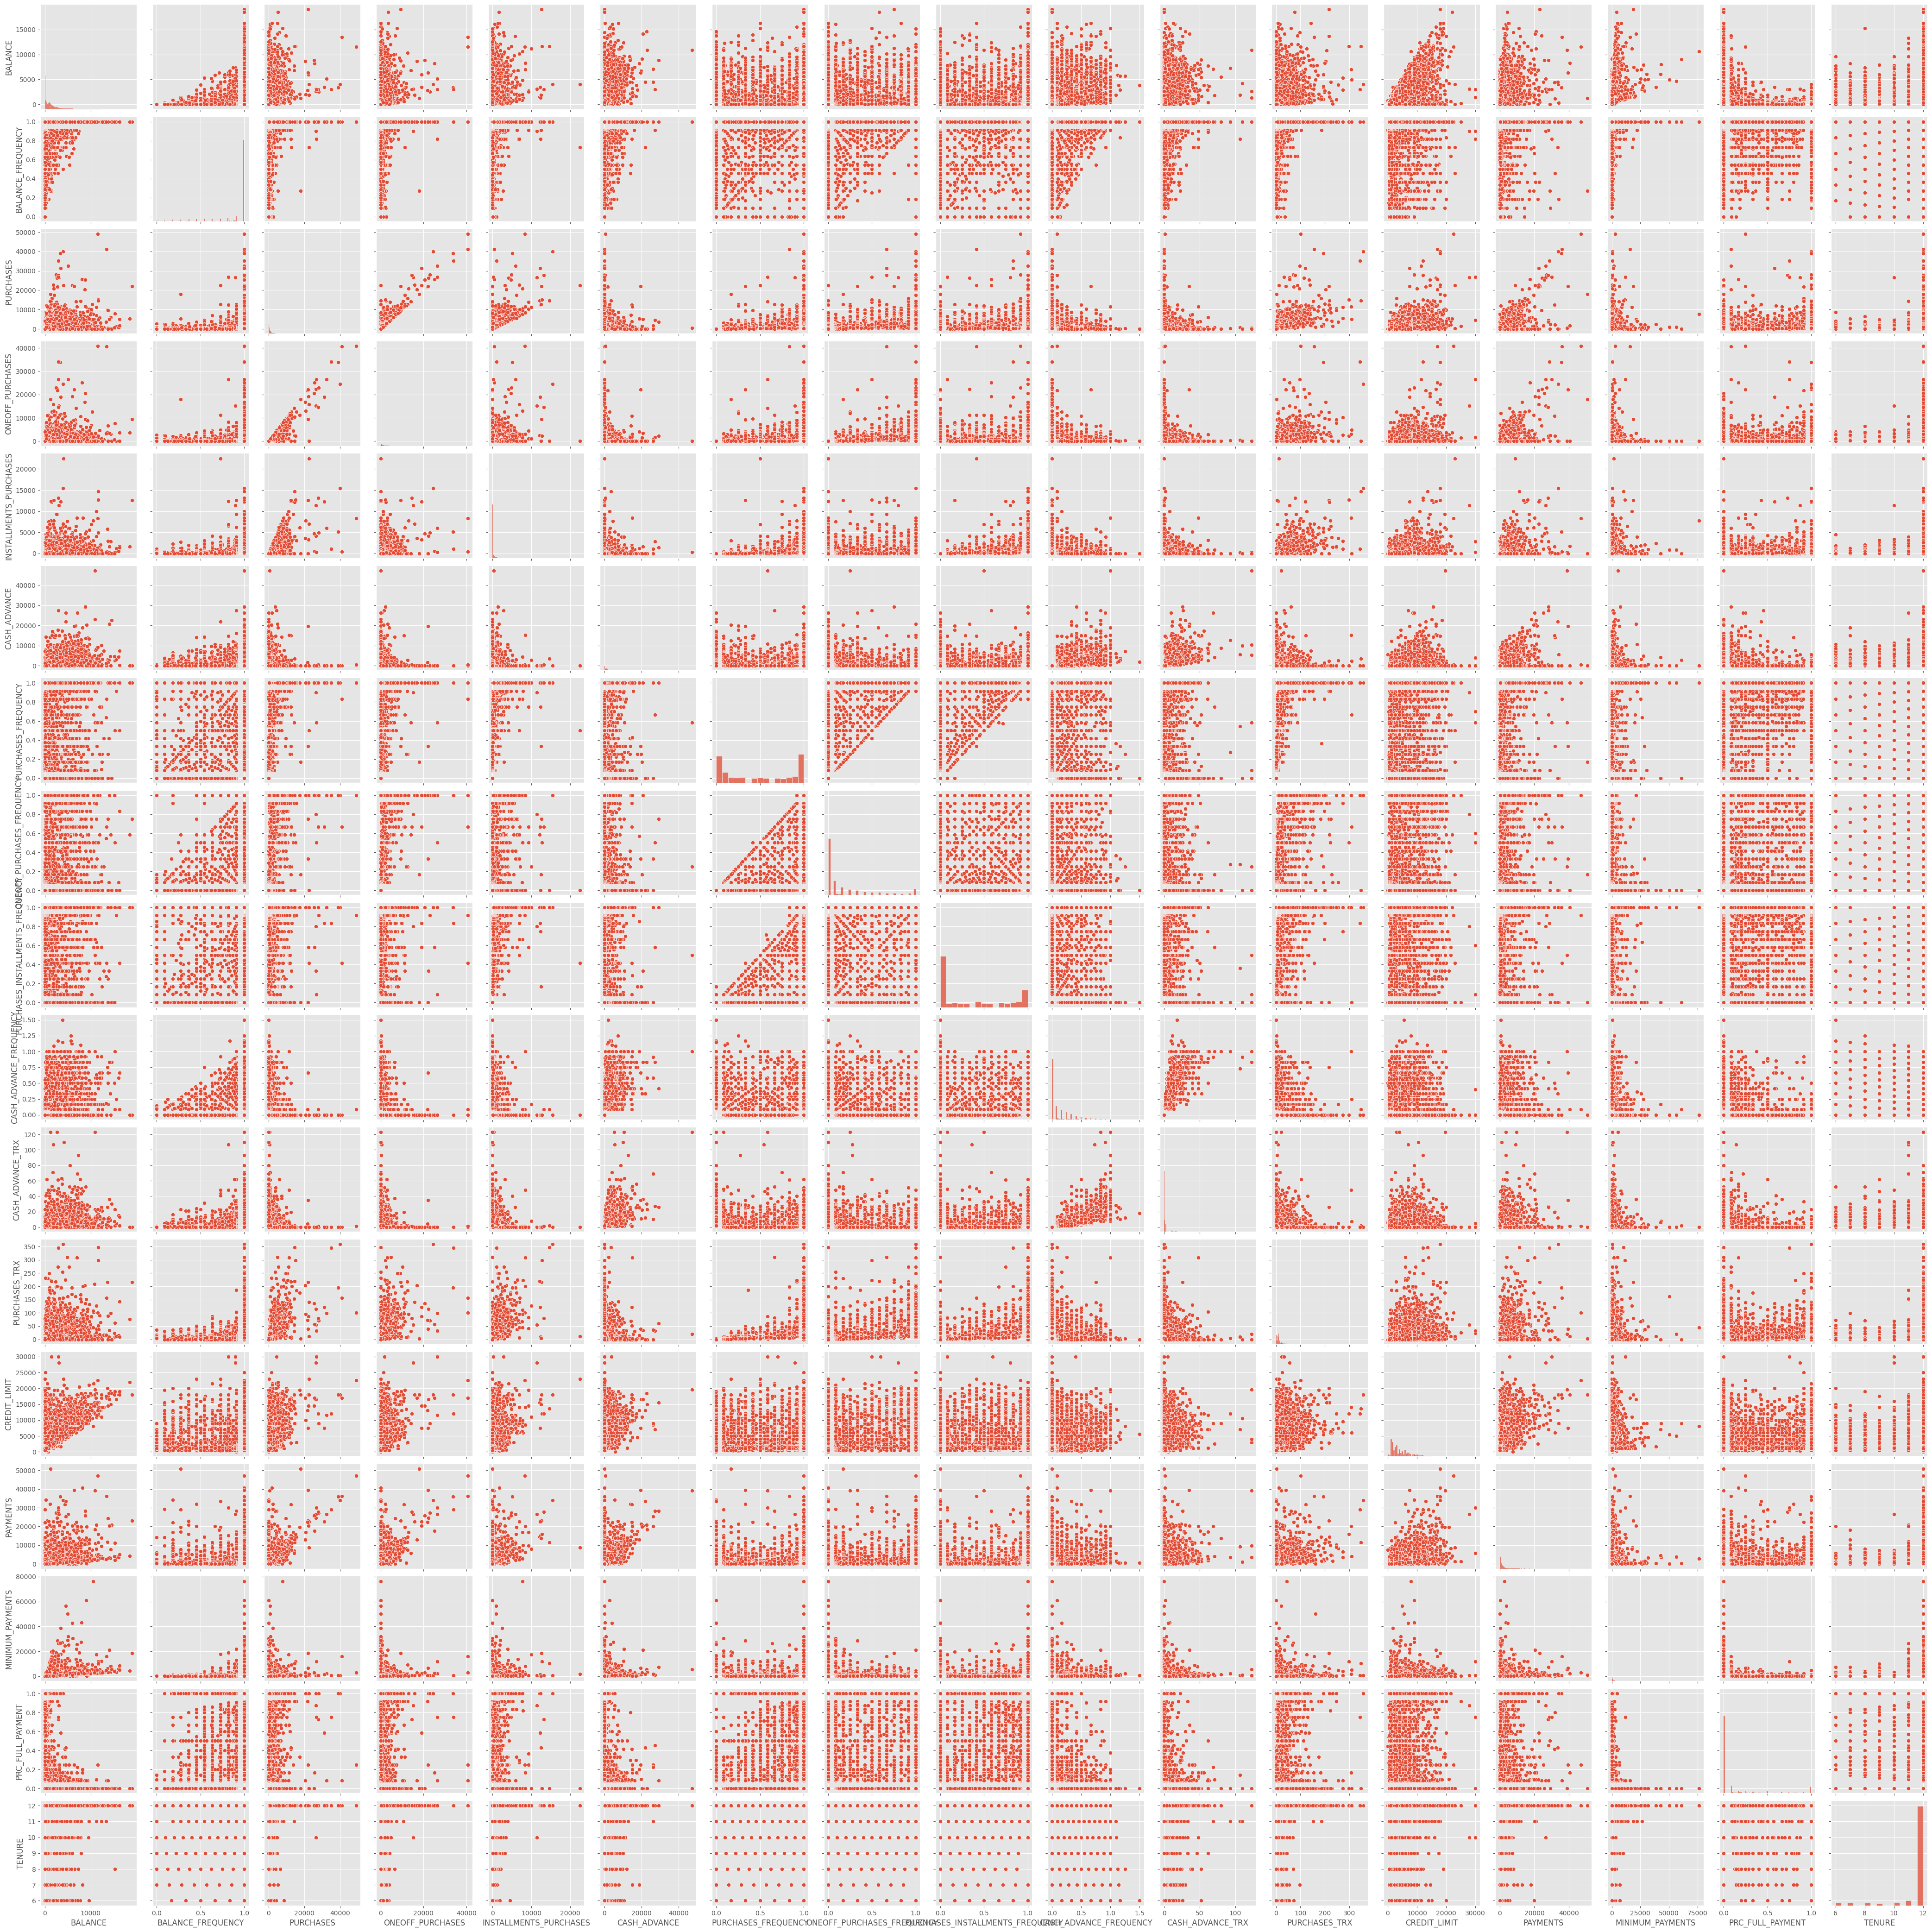

In [44]:
sns.pairplot(df)
plt.show()

### train model

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=17) # 95% variance
principal_components = pca.fit_transform(data_scaled)

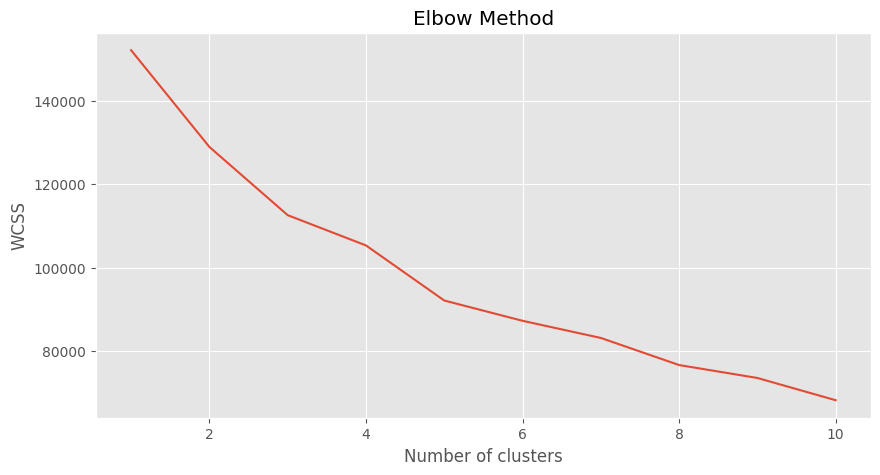

In [47]:
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principal_components)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [48]:
reconstructed_data = pca.inverse_transform(principal_components)
reconstruction_error = np.mean(np.square(df - reconstructed_data))

In [49]:
reconstruction_error

4278891.392195234

In [50]:

# Apply K-Means clustering
optimal_clusters =3 # Example number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=46)
clusters = kmeans.fit_predict(principal_components)

In [51]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(df, clusters)
silhouette

0.34185160739853465

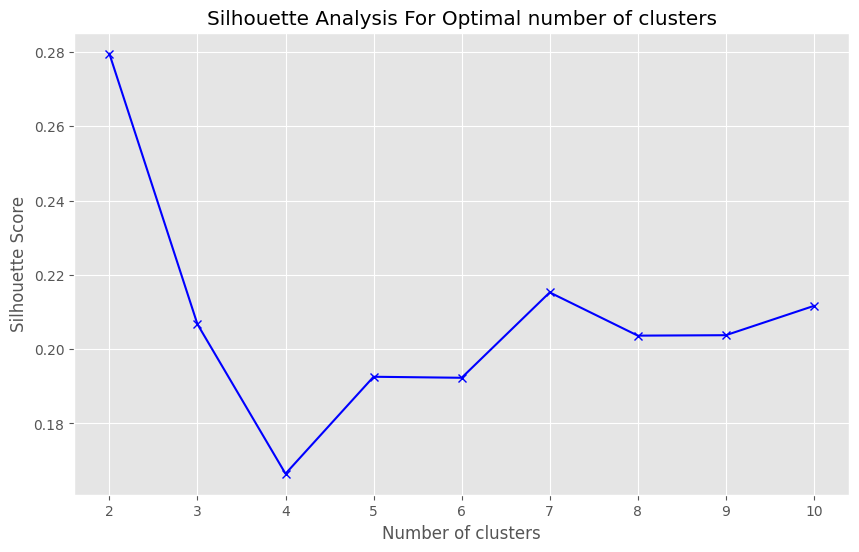

Optimal number of clusters: 2


In [52]:


# Assuming 'principal_components' is your data
range_n_clusters = list(range(2, 11))  # Trying cluster sizes from 2 to 10
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(principal_components)
    silhouette_avg.append(silhouette_score(principal_components, clusters))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal number of clusters')
plt.show()

# Find the optimal number of clusters based on silhouette score
optimal_clusters = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
print('Optimal number of clusters:', optimal_clusters)


Text(0, 0.5, 'PC2')

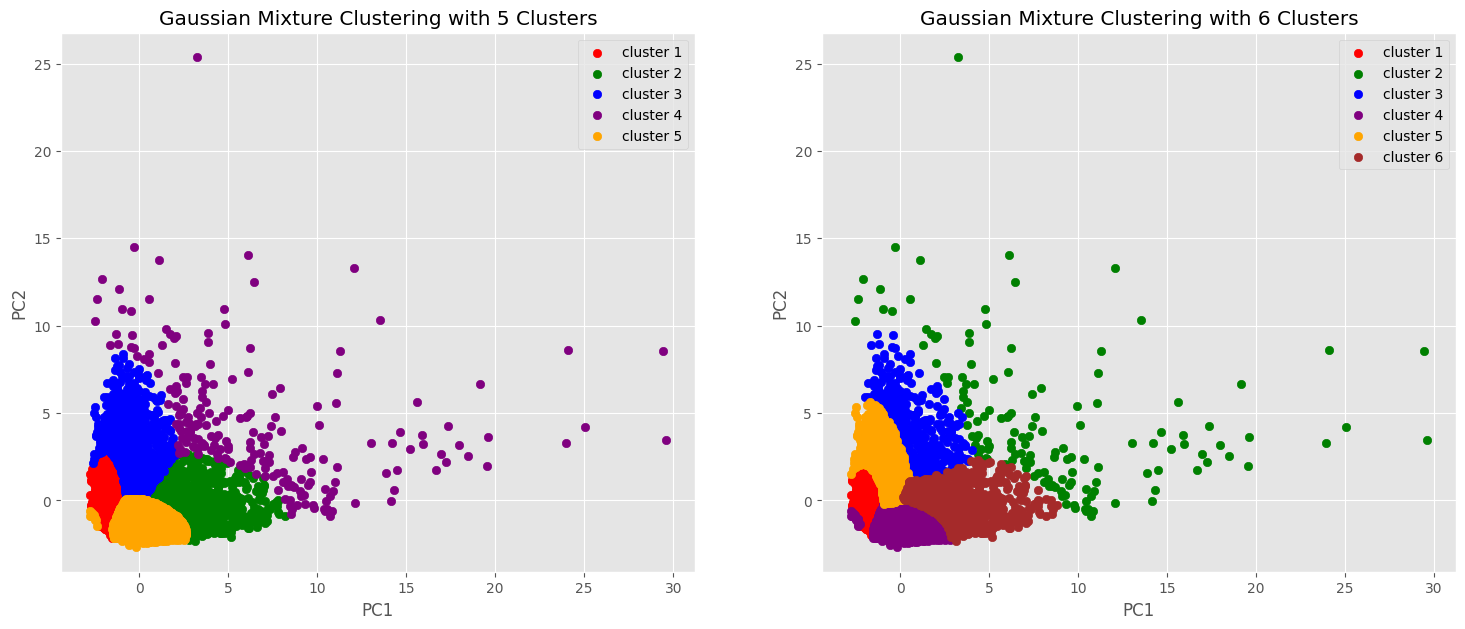

In [53]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(principal_components))
preds = pd.Series(GaussianMixture(n_components = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Gaussian Mixture Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(principal_components))
preds = pd.Series(GaussianMixture(n_components = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Gaussian Mixture Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')